In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import seaborn as sns
from IPython.display import display
from sklearn.metrics import r2_score

In [ ]:
# @title Create fake data
np.random.seed(42)  # for reproducibility

# Assuming three species: Species A, Species B, Species C
species = ['Species A'] * 50 + ['Species B'] * 50 + ['Species C'] * 50
real_values = np.concatenate([
    np.random.normal(10, 2, 50),   # Species A
    np.random.normal(15, 3, 50),   # Species B
    np.random.normal(5, 1, 50)     # Species C
])
predicted_values = real_values + np.random.normal(0, 2, 150)

# Create DataFrame
df = pd.DataFrame({'Species': species, 'Real Values': real_values, 'Predicted Values': predicted_values})

# Display the DataFrame
df

,Species,Real Values,Predicted Values
0,Species A,10.993428,11.494414
1,Species A,9.723471,10.416368
2,Species A,11.295377,9.935328
3,Species A,13.046060,13.510567
4,Species A,9.531693,10.117838
...,...,...,...
145,Species C,5.781823,4.396004
146,Species C,3.763049,5.562249
147,Species C,3.679543,4.294142
148,Species C,5.521942,7.147666


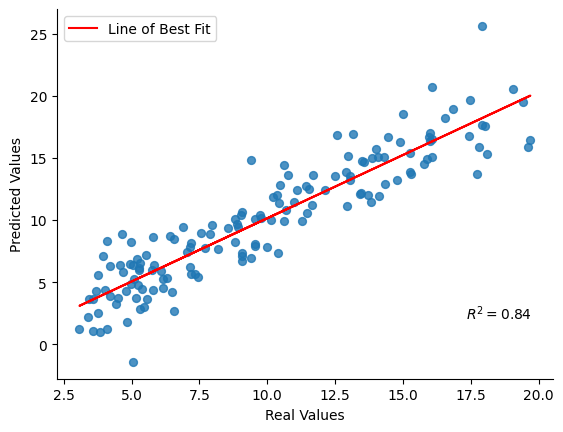

In [ ]:
# @title Correlation Graph (All species)

df.plot(kind='scatter', x='Real Values', y='Predicted Values', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


# Line of best fit
real_values = df['Real Values'].values
predicted_values = df['Predicted Values'].values
fit = np.polyfit(real_values, predicted_values, 1)
fit_fn = np.poly1d(fit)
plt.plot(real_values, fit_fn(real_values), color='red', label='Line of Best Fit')

# R^2 value
r_squared = r2_score(predicted_values, fit_fn(real_values))
plt.text(plt.xlim()[1] - 2, 2, f'$R^2 = {r_squared:.2f}$', fontsize=10, ha='center')

# Set plot properties
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend()
plt.show()

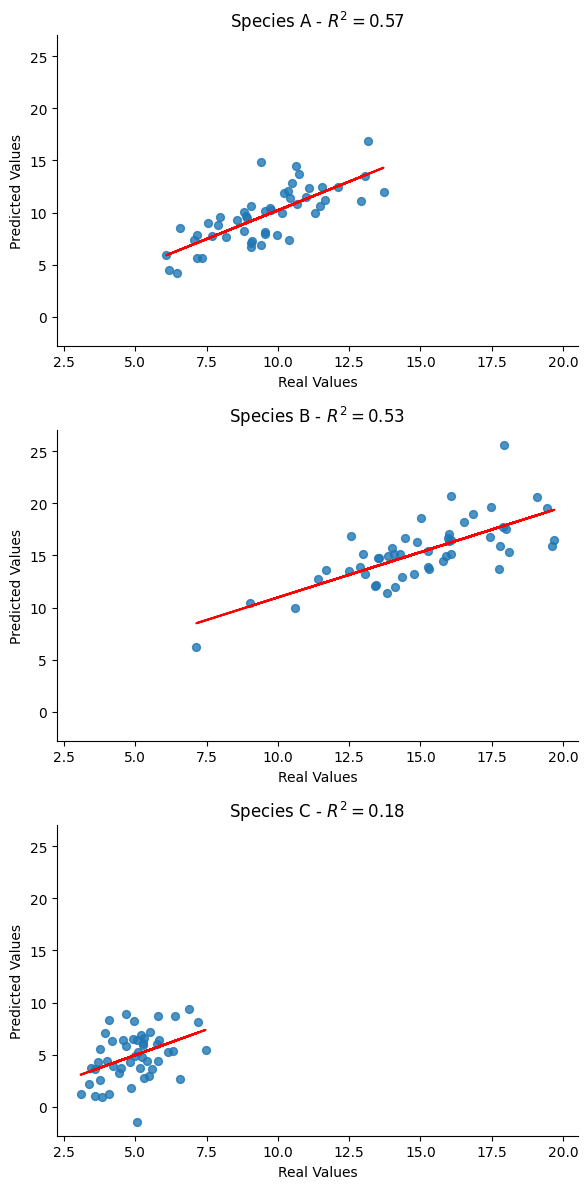

In [ ]:
# @title Correlation Graph (per species)
species = ['Species A', 'Species B', 'Species C']
fig, axes = plt.subplots(nrows=len(species), ncols=1, figsize=(6, 12), sharex=True, sharey=True)

for i, (species_name, group) in enumerate(df.groupby('Species')):
    # Scatter plot
    ax = axes[i]
    ax.scatter(group['Real Values'], group['Predicted Values'], s=32, alpha=0.8)

    # Line of best fit
    fit = np.polyfit(group['Real Values'], group['Predicted Values'], 1)
    fit_fn = np.poly1d(fit)
    ax.plot(group['Real Values'], fit_fn(group['Real Values']), color='red')

    # R^2 value
    r_squared = r2_score(group['Predicted Values'], fit_fn(group['Real Values']))

    # Title with species name and R^2 value
    ax.set_title(f'{species_name} - $R^2 = {r_squared:.2f}$')

    # Set plot properties
    ax.set_xlabel('Real Values')
    ax.set_ylabel('Predicted Values')
    ax.spines[['top', 'right']].set_visible(False)

    # Show x-axis tick labels in all plots
    ax.tick_params(axis='x', which='both', labelbottom=True)


# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

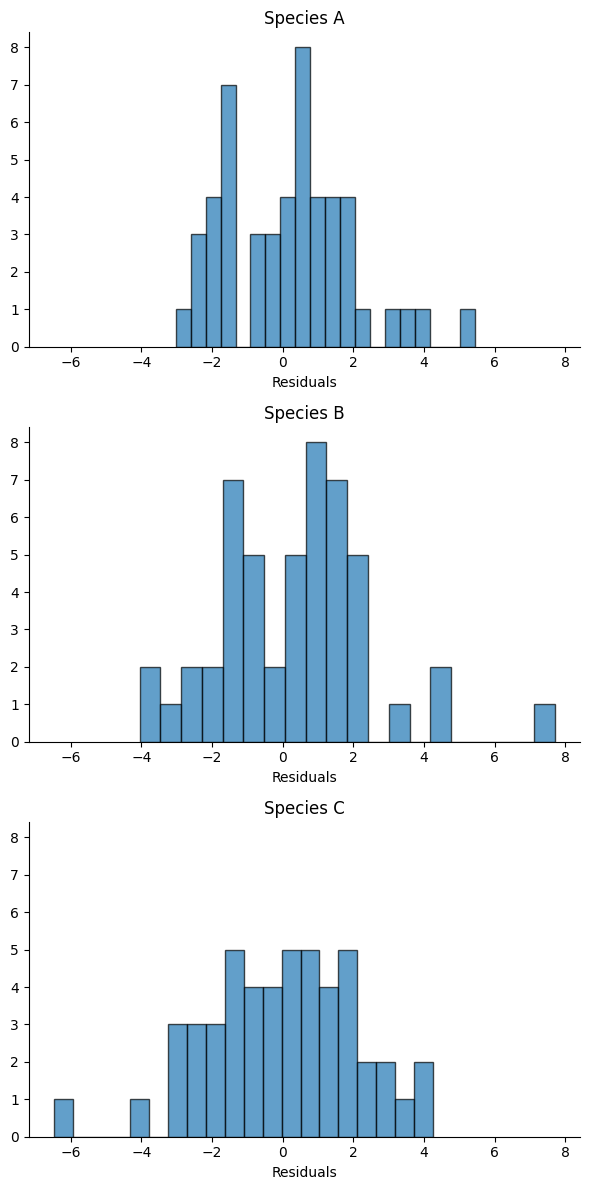

In [ ]:
# @title Residuals vs Amount of promoters - 2 OPTIONS - TO CHECK WITH RAYMOND
# Generating fake data for testing
amount_promoter = np.random.randint(0, 10, size=150)

# Create DataFrame
df['Amount Promoter']= amount_promoter

# Create subplots for each species
species_list = df['Species'].unique()
fig, axes = plt.subplots(nrows=len(species_list), ncols=1, figsize=(6, 12), sharex=True, sharey=True)

for i, species_name in enumerate(species_list):
    # Filter data for the specific species
    species_data = df[df['Species'] == species_name]

    # Calculate residuals
    residuals = species_data['Predicted Values'] - species_data['Real Values']

    # Plot histogram
    ax = axes[i]
    ax.hist(residuals, bins=20, edgecolor='black', alpha=0.7)

    # Title with species name
    ax.set_title(f'{species_name}')

    # Set plot properties
    ax.set_xlabel('Residuals')
    # ax.set_ylabel('Amount Promoter')
    ax.spines[['top', 'right']].set_visible(False)

    # Show x-axis tick labels in all plots
    ax.tick_params(axis='x', which='both', labelbottom=True)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

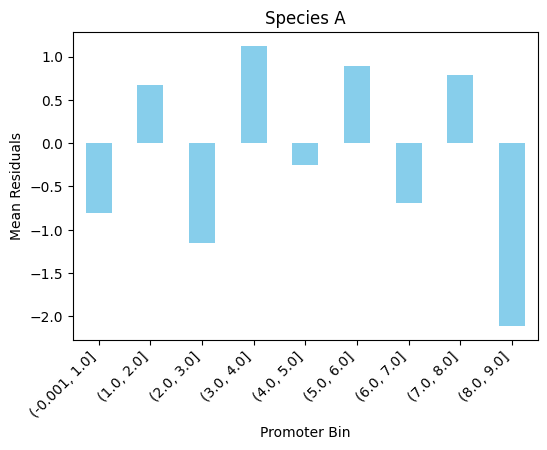

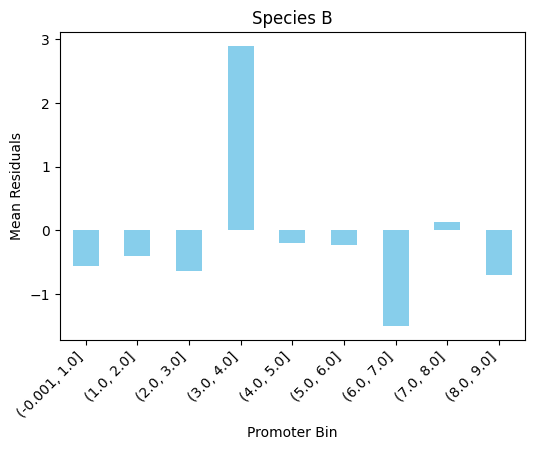

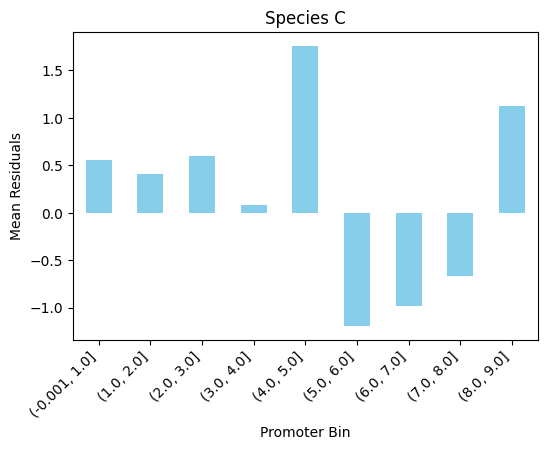

In [ ]:
# @title OPTION 2
amount_promoter = np.random.randint(0, 10, size=150)

# Create DataFrame
df['Amount Promoter']= amount_promoter

# Calculate residuals
df['Residuals'] = df['Real Values'] - df['Predicted Values']

# Calculate min and max values of 'Amount Promoter'
min_amount = df['Amount Promoter'].min()
max_amount = df['Amount Promoter'].max()

# Create a new column 'Promoter Bin' based on 'Amount Promoter'
df['Promoter Bin'], _ = pd.cut(df['Amount Promoter'], bins=np.linspace(min_amount, max_amount, 10), include_lowest=True, retbins=True)


# Create subplots for each species
species_list = df['Species'].unique()

for i, species_name in enumerate(species_list):
    # Filter data for the specific species
    species_data = df[df['Species'] == species_name]

    plt.figure(figsize=(6, 4))
    species_data.groupby('Promoter Bin')['Residuals'].mean().plot(kind='bar', color='skyblue')
    plt.title(f'{species_name}')
    plt.xlabel('Promoter Bin')
    plt.ylabel('Mean Residuals')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    # Bar plot of residuals vs. promoter bin



In [ ]:
# Display the resulting DataFrame
df

,Species,Real Values,Predicted Values,Amount Promoter,Promoter Bin,Residuals
0,Species A,10.993428,11.494414,5,"(4.0, 5.0]",-0.500986
1,Species A,9.723471,10.416368,2,"(1.0, 2.0]",-0.692896
2,Species A,11.295377,9.935328,2,"(1.0, 2.0]",1.360049
3,Species A,13.046060,13.510567,8,"(7.0, 8.0]",-0.464507
4,Species A,9.531693,10.117838,6,"(5.0, 6.0]",-0.586145
...,...,...,...,...,...,...
145,Species C,5.781823,4.396004,8,"(7.0, 8.0]",1.385819
146,Species C,3.763049,5.562249,0,"(-0.001, 1.0]",-1.799200
147,Species C,3.679543,4.294142,0,"(-0.001, 1.0]",-0.614599
148,Species C,5.521942,7.147666,6,"(5.0, 6.0]",-1.625724


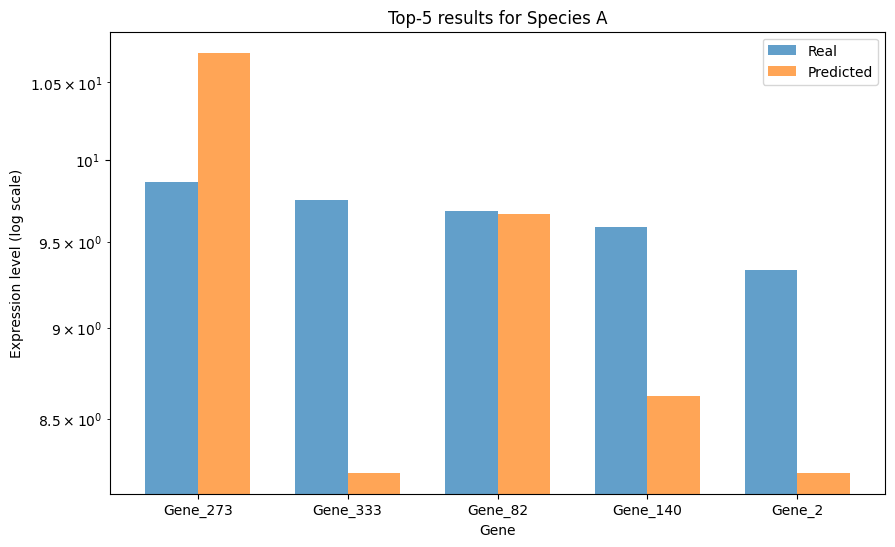

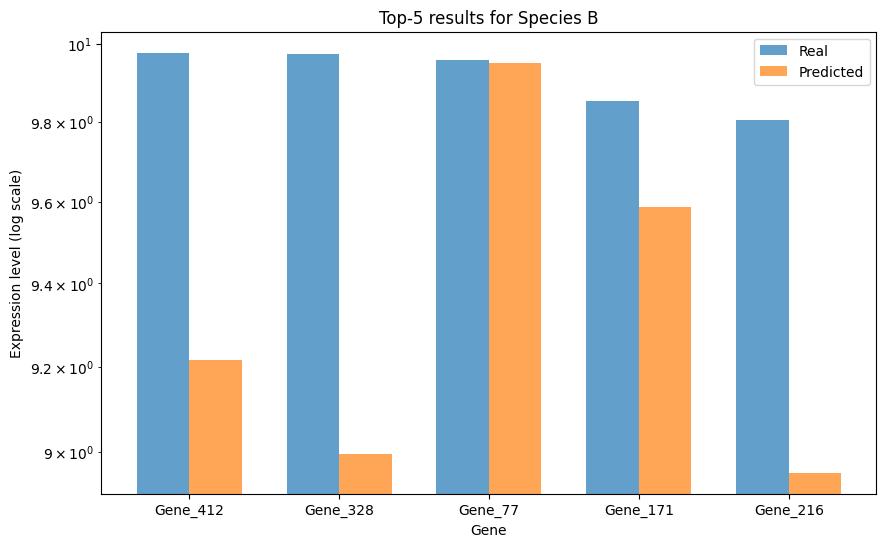

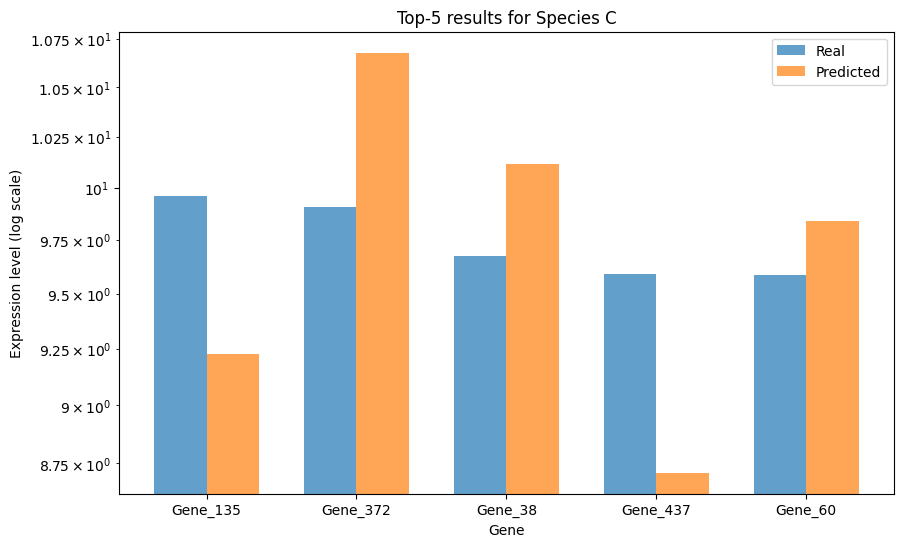

In [ ]:
# @title Clustered bar chart of top X results

# Creating fake data for testing
np.random.seed(42)
species = np.random.choice(['Species A', 'Species B', 'Species C'], size=500)
genes = [f'Gene_{i}' for i in range(1, 501)]
real_values = np.random.rand(500) * 10
predicted_values = real_values + np.random.randn(500)

# Create DataFrame
df = pd.DataFrame({'Species': species, 'Gene': genes, 'Real Values': real_values, 'Predicted Values': predicted_values})

# Calculate the ranking of the gene's expression
# df['Rank_Real'] = df.groupby('Species')['Real Values'].rank(ascending=False)

# Top-X values to display
# top_x_values = [5, 10, 25, 50, 100]
top_x_value = 5

# Create a clustered bar chart for each species
for species_name, group in df.groupby('Species'):
    plt.figure(figsize=(10, 6))

    top_x_group = group.nlargest(top_x_value, 'Real Values')  # Select the top-X based on Real Values

    # Set the width of the bars
    bar_width = 0.35

    # Set the x-axis positions for real values and predicted values
    x_positions_real = np.arange(len(top_x_group['Gene']))
    x_positions_pred = x_positions_real + bar_width

    # Plotting real values
    plt.bar(x_positions_real, top_x_group['Real Values'], label=f'Real', alpha=0.7, width=bar_width)

    # Plotting predicted values
    plt.bar(x_positions_pred, top_x_group['Predicted Values'], label=f'Predicted', alpha=0.7, width=bar_width)

    plt.yscale('log')  # Log-scaled y-axis
    plt.title(f'Top-{top_x_value} results for {species_name}')
    plt.xlabel('Gene')
    plt.ylabel('Expression level (log scale)')
    plt.xticks(x_positions_real + bar_width / 2, top_x_group['Gene'])  # Set x-axis ticks at the center of the clustered bars
    plt.legend()
    plt.show()

# Bonus: Plot expression signal and save to MLFlow

Order the genes from the highest expression to the least on the label data, and
preserve that order when plotting the predicted expression.
Keep the y-axis consistent when plotting each of these signals.


In [ ]:
# Creating fake data for testing
np.random.seed(42)
species = np.random.choice(['Species A', 'Species B', 'Species C'], size=500)
genes = [f'Gene_{i}' for i in range(1, 501)]
real_values = np.random.rand(500) * 10
predicted_values = real_values + np.random.randn(500)

# Create DataFrame
df = pd.DataFrame({'Species': species, 'Gene': genes, 'Real Values': real_values, 'Predicted Values': predicted_values})
df

,Species,Gene,Real Values,Predicted Values
0,Species C,Gene_1,0.153045,-0.907213
1,Species A,Gene_2,9.334363,8.216418
2,Species C,Gene_3,5.010399,3.647695
3,Species C,Gene_4,5.393774,3.482521
4,Species A,Gene_5,6.839638,6.272475
...,...,...,...,...
495,Species B,Gene_496,4.589890,6.210320
496,Species B,Gene_497,5.573054,6.195451
497,Species A,Gene_498,8.606320,8.664722
498,Species B,Gene_499,5.350697,5.440305


In [ ]:
# @title Plot expression as signal
# Group by 'Species' and create lists of genes and real values for each group
max_y = max(df['Predicted Values'].max(), df['Real Values'].max())
grouped_data = df.groupby('Species').apply(lambda x: {'genes': x['Gene'].tolist(), 'real_values': x['Real Values'].tolist(), 'predicted_values': x['Predicted Values'].tolist()}).reset_index()

for species in df.Species.unique():
    df_signal_species = pd.DataFrame({"real_values": grouped_data[grouped_data.Species==species][0].values[0]['real_values'],
                "genes":grouped_data[grouped_data.Species==species][0].values[0]['genes'],
                  "predicted_values":grouped_data[grouped_data.Species==species][0].values[0]['predicted_values'] })

    df_signal_species = df_signal_species.sort_values("real_values", ascending=False).reset_index()

    # multiple unpivot columns
    melted_signal = pd.melt(df_signal_species, id_vars=['genes'], value_vars=['real_values', 'predicted_values'], var_name='Expression')

    # Create an interactive plot using Plotly Express
    fig = px.line(melted_signal, x='genes', y='value', color="Expression",
                  title=f'{species} - Gene Expression per gene',
                  line_shape='linear')
    fig.update_yaxes(title="Expression")
    fig.update_layout(xaxis_title='Gene', width=1000, height=400 , template="none")
    fig.update_layout(yaxis_range=[0, max_y])
    fig.show()